In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("Preplacementdata.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

#Find How many of them are not placed?

In [5]:
status_counts = dataset['status'].value_counts()
print("--- Placement Status Counts ---")
print(status_counts)
# 67 of them are not Placed

--- Placement Status Counts ---
status
Placed        148
Not Placed     67
Name: count, dtype: int64


#Find the reason for non placement from the dataset?

In [6]:
pd.crosstab(dataset['status'], dataset['workex'], normalize='index') * 100

workex,No,Yes
status,,
Not Placed,85.074627,14.925373
Placed,56.756757,43.243243


#What kind of relation between salary and mba_p

In [7]:
dataset.corr(numeric_only=True)
# Correlation Results
# Correlation between mba_p and Salary is 0.13 , looks like a Zero Correlation 

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


#Which specialization is getting minimum salary?

In [8]:
# First, filter to only get placed students
placed_data = dataset[dataset['salary'] > 0]

# We are comparing TWO variables: 'specialisation' and 'salary'
min_salary_by_specialisation = placed_data.groupby('specialisation')['salary'].min()
print(min_salary_by_specialisation)

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64


#How many of them getting above 500000 salary?

In [9]:
placed_data = dataset[dataset['salary'] > 500000]
print(placed_data)

     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary gender    ssc_b  \
119  120.0   60.8  68.40      64.6    82.66  64.34  940000.0      M  Central   
150  151.0   71.0  58.66      58.0    56.00  61.30  690000.0      M  Central   
177  178.0   73.0  97.00      79.0    89.00  70.81  650000.0      F  Central   

       hsc_b     hsc_s   degree_t workex specialisation  status  
119  Central  Commerce  Comm&Mgmt    Yes        Mkt&Fin  Placed  
150  Central   Science   Sci&Tech    Yes        Mkt&Fin  Placed  
177   Others  Commerce  Comm&Mgmt    Yes        Mkt&Fin  Placed  


#Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [10]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

# In our result
# p-value = 4.67e-21
# α = 0.05
# Since the p-value is less than 0.05, we Reject H₀.

# Final Conclusion
# There is a significant difference in etest_p scores.

F_onewayResult(statistic=np.float64(98.64487057324708), pvalue=np.float64(4.672547689133573e-21))

#Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


In [24]:

#Importing the T-Test Function
from scipy.stats import ttest_ind

# Extracting salaries for 'Sci&Tech' degree holders
deg_sci=dataset[dataset['degree_t']=='Sci&Tech']['salary']

# Extracting salaries for 'Mkt&HR' specialisation holders
spec_mkt=dataset[dataset['specialisation']=='Mkt&HR']['salary']

#function call
print(ttest_ind(deg_sci,spec_mkt))

#Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)
# ANOVA results
f_statistic = 2.692041243555374
p_value = 0.007897969943471179

# Significance level
alpha = 0.05  # 5%

# Decision based on the p-value
if p_value <= alpha:
    decision = "Reject the null hypothesis: There is a significant difference in salaries."
else:
    decision = "Fail to reject the null hypothesis: No significant difference in salaries."

print(decision)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))
Reject the null hypothesis: There is a significant difference in salaries.


#Convert the normal distribution to standard normal distribution for salary column

In [11]:
placed_dataset = dataset[dataset['salary'] > 0]

In [12]:
# We calculate the mean (μ) and standard deviation (σ)
# using ONLY the placed students' salaries.
mean_salary = placed_dataset['salary'].mean()
std_dev_salary = placed_dataset['salary'].std()
print(f"Mean: {mean_salary}, Std Dev: {std_dev_salary}")

Mean: 288655.4054054054, Std Dev: 93457.45241958875


In [13]:
#Z = (X - μ) / σ

In [14]:
placed_dataset['salary_zscore'] = (placed_dataset['salary'] - mean_salary) / std_dev_salary
print(placed_dataset[['salary', 'salary_zscore']])

       salary  salary_zscore
0    270000.0      -0.199614
1    200000.0      -0.948618
2    250000.0      -0.413615
4    425000.0       1.458895
7    252000.0      -0.392215
..        ...            ...
209  216000.0      -0.777417
210  400000.0       1.191393
211  275000.0      -0.146114
212  295000.0       0.067888
213  204000.0      -0.905818

[148 rows x 2 columns]


In [15]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values =[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

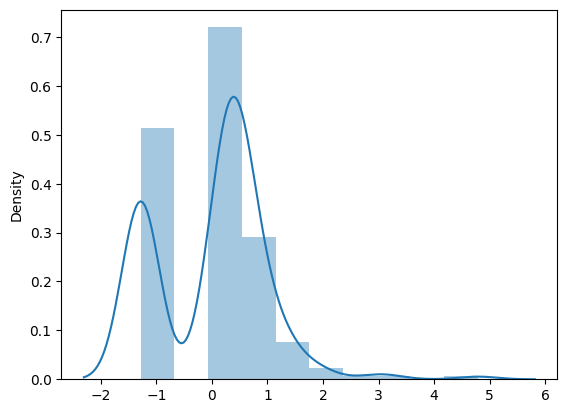

In [16]:
stdNBgraph(dataset['salary'])

#What is the probability Density Function of the salary range from 700000 to 900000?

In [17]:
#Calculate the Parameters
# To use the normal distribution, we need two numbers:
#   - Mean (μ): The center of the curve (average salary).
#   - Std Dev (σ): How spread out the curve is.

mean_salary = placed_dataset['salary'].mean()
std_dev_salary = placed_dataset['salary'].std()

#Calculate the Probability using CDF
# We want the range: 700,000 to 900,000
# Probability of salary < 900,000
from scipy.stats import norm
prob_less_than_900k = norm.cdf(900000, mean_salary, std_dev_salary)
print(prob_less_than_900k)

# Probability of salary < 700,000
prob_less_than_700k = norm.cdf(700000, mean_salary, std_dev_salary)
print(prob_less_than_700k)

#Find the Difference
# The probability of being BETWEEN 700k and 900k is the difference.
probability_range = prob_less_than_900k - prob_less_than_700k

print(f"Probability: {probability_range}")

#to find the probability of a range (from A to B), you technically use the Cumulative Distribution Function (CDF).PDF: 
#Tells  the height of the curve at one specific point.CDF: Tells you the area under the curve up to a point (which represents probability).
#Since we need the probability for a range ($700k - 900k$), calculating the area (CDF) is the correct mathematical approach.

0.9999999999695316
0.9999946225237726
Probability: 5.377445759013888e-06


#Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using HypothesisTesting)

In [18]:
import pandas as pd
from scipy.stats import ttest_rel

#  analyze students whose degree type is 'Sci&Tech'
scitech_students = dataset[dataset['degree_t'] == 'Sci&Tech']

#Run the Paired T-Test
# compare two columns (etest_p and mba_p) from the SAME group of students.
# This is why we use 'ttest_rel' (related/paired samples), not 'ttest_ind'.
t_statistic, p_value = ttest_rel(scitech_students['etest_p'], scitech_students['mba_p'])

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("H0 - Reject Null Hypothesis. There is a significant difference.")
else:
    print("H1 - Accept Null Hypothesis. There is no significant difference.")

T-Statistic: 5.0049844583693615
P-Value: 5.517920600505392e-06
H0 - Reject Null Hypothesis. There is a significant difference.


#Which parameter is highly correlated with salary?

In [19]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000
